In [1]:
import cv2
import numpy as np

In [30]:
image = cv2.imread('car.jpg')
background = cv2.imread('bg.jpg')

In [31]:
import matplotlib.pyplot as plt

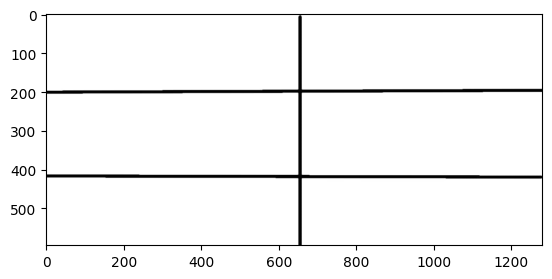

In [32]:
plt.imshow(background)

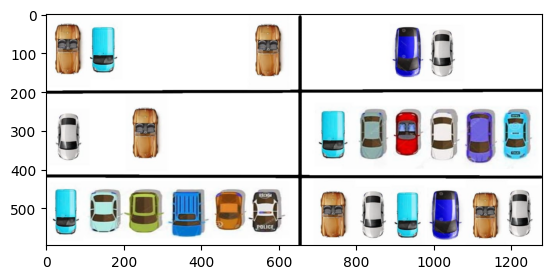

In [33]:
plt.imshow(image)

In [34]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bg = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

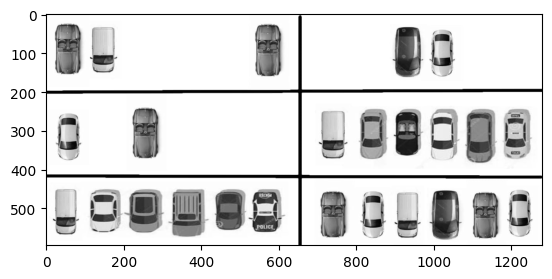

In [35]:
plt.imshow(img,cmap="gray")

In [36]:
fr_diff = cv2.absdiff(img, bg)

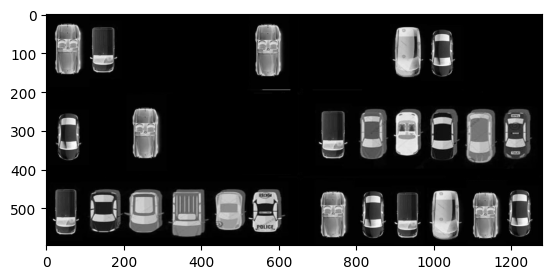

In [38]:
plt.imshow(fr_diff,cmap="gray")

In [51]:
thresh = 11
_, fg = cv2.threshold(fr_diff, thresh, 255, cv2.THRESH_BINARY)

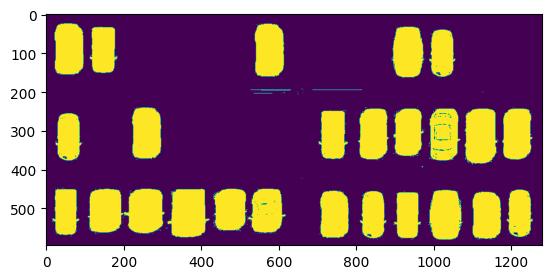

In [52]:
plt.imshow(fg)

In [53]:
sd = cv2.convertScaleAbs(fg)

In [ ]:

level, m = cv2.threshold(sd, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
k = cv2.medianBlur(m, 5)
bw = cv2.threshold(k, 0, 255, cv2.THRESH_BINARY)[1]

# Find contours
contours, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fill contours
bw2 = bw.copy()
cv2.fillPoly(bw2, contours, 255)

In [13]:
bw3 = cv2.morphologyEx(bw2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)))


In [14]:
_, labeled, _, _ = cv2.connectedComponentsWithStats(bw3, 8, cv2.CV_32S)

# Calculate number of cars
number_of_cars = np.max(labeled)

In [15]:
number_of_cars

25